#  Importing Libraries

In [1]:
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Importing Data

In [2]:
battles = pd.read_csv("battles.csv")
character_deaths = pd.read_csv("character-deaths.csv")

# Analysis

## Battles Dataset

In [3]:
battles.shape

(38, 25)

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
# Total of Major Deaths/ Major Captures Happened those years
battles.groupby(by="year")[["major_death", "major_capture"]].sum()

,major_death,major_capture
year,,
298,4.0,3.0
299,8.0,6.0
300,1.0,2.0


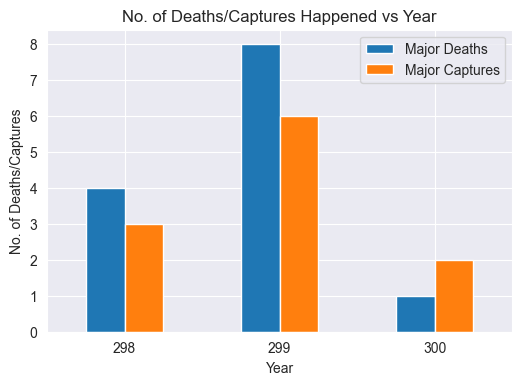

In [6]:
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = (100)
p = battles.groupby(by="year")[["major_death", "major_capture"]].sum().plot.bar(rot=0)
plt.title("No. of Deaths/Captures Happened vs Year")
plt.xlabel("Year")
plt.ylabel("No. of Deaths/Captures")
plt.legend(["Major Deaths", "Major Captures"])
plt.show()

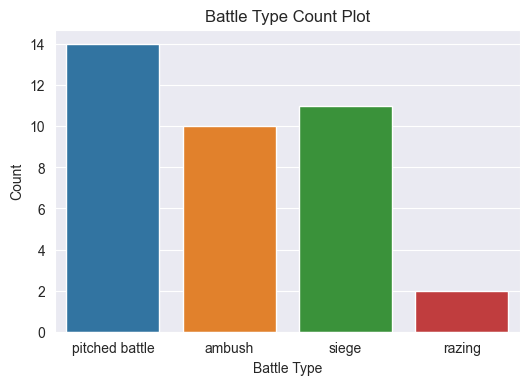

In [7]:
sns.countplot(x=battles.battle_type)
plt.title("Battle Type Count Plot")
plt.xlabel("Battle Type")
plt.ylabel("Count")
plt.show()

In [8]:
# Renaming Some Columns
battles.rename(columns={"attacker_1": "primary_attacker"}, inplace=True)
battles.rename(columns={"defender_1": "primary_defender"}, inplace=True)

In [9]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [10]:
battles.attacker_king.value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [11]:
battles.defender_king.value_counts()

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Renly Baratheon              1
Mance Rayder                 1
Name: defender_king, dtype: int64

In [12]:
battles.location.value_counts()

Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

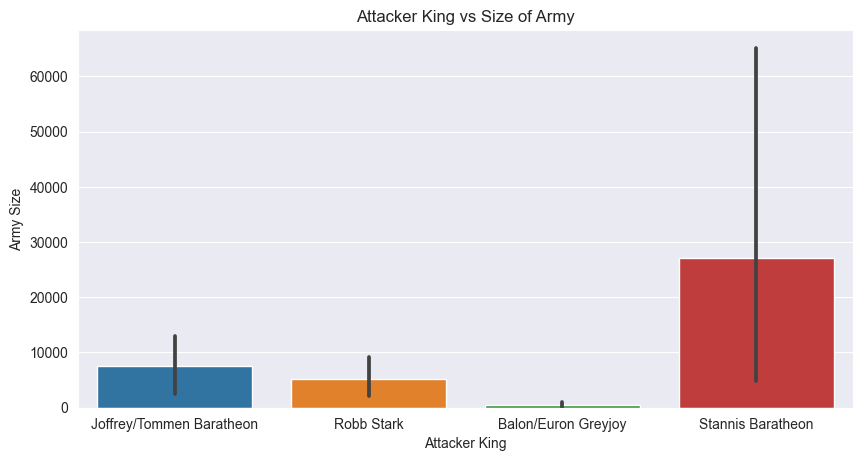

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = (100)
sns.barplot(x="attacker_king", y="attacker_size", data=battles)
plt.title("Attacker King vs Size of Army")
plt.xlabel("Attacker King")
plt.ylabel("Army Size")
plt.show()

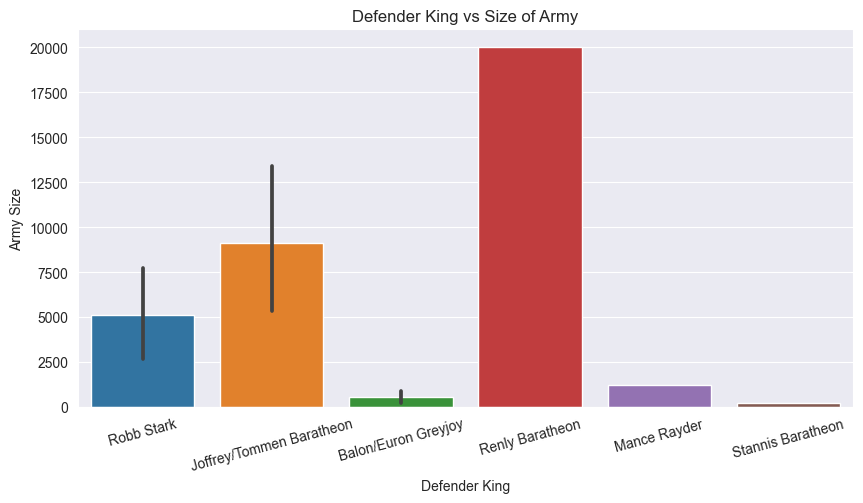

In [14]:
sns.barplot(x="defender_king", y="defender_size", data=battles)
plt.title("Defender King vs Size of Army")
plt.xlabel("Defender King")
plt.ylabel("Army Size")
plt.xticks(rotation=15)
plt.show()

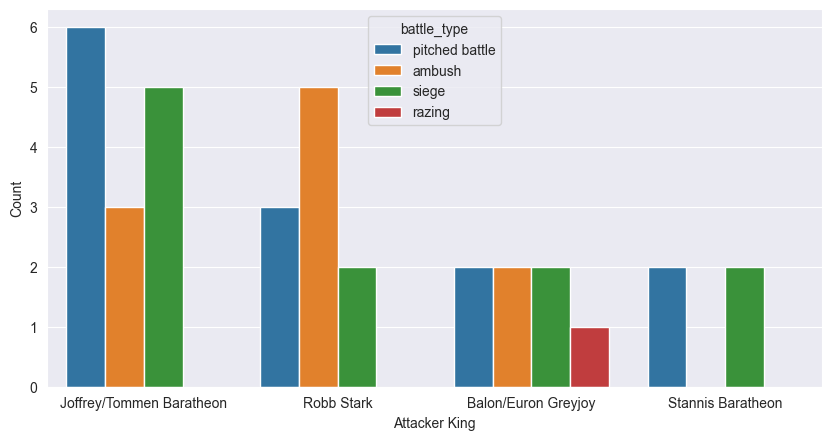

In [15]:
sns.countplot(x=battles.attacker_king, hue=battles.battle_type)
plt.xlabel("Attacker King")
plt.ylabel("Count")
plt.show()

## Character Deaths Dataset

In [16]:
character_deaths.shape

(917, 13)

In [17]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [18]:
character_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [19]:
character_deaths.Gender.value_counts()

1    760
0    157
Name: Gender, dtype: int64

In [20]:
character_deaths.Nobility.value_counts()

0    487
1    430
Name: Nobility, dtype: int64

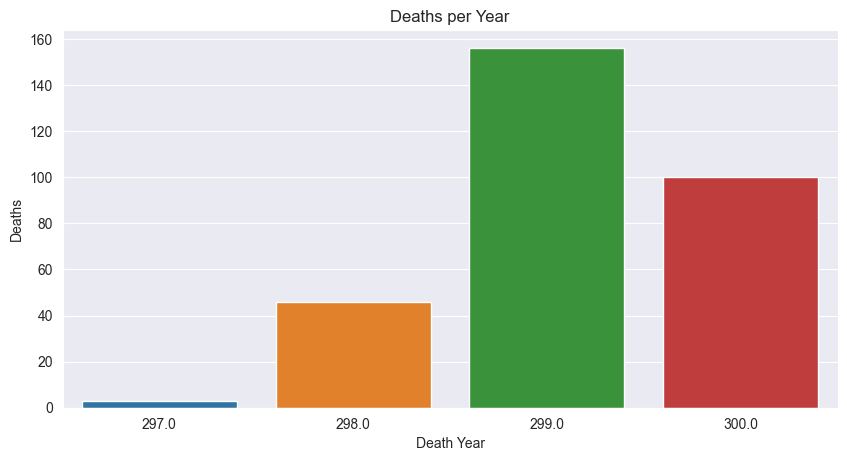

In [22]:
sns.countplot(x=character_deaths["Death Year"])
plt.title("Deaths per Year")
plt.xlabel("Death Year")
plt.ylabel("Deaths")
plt.show()

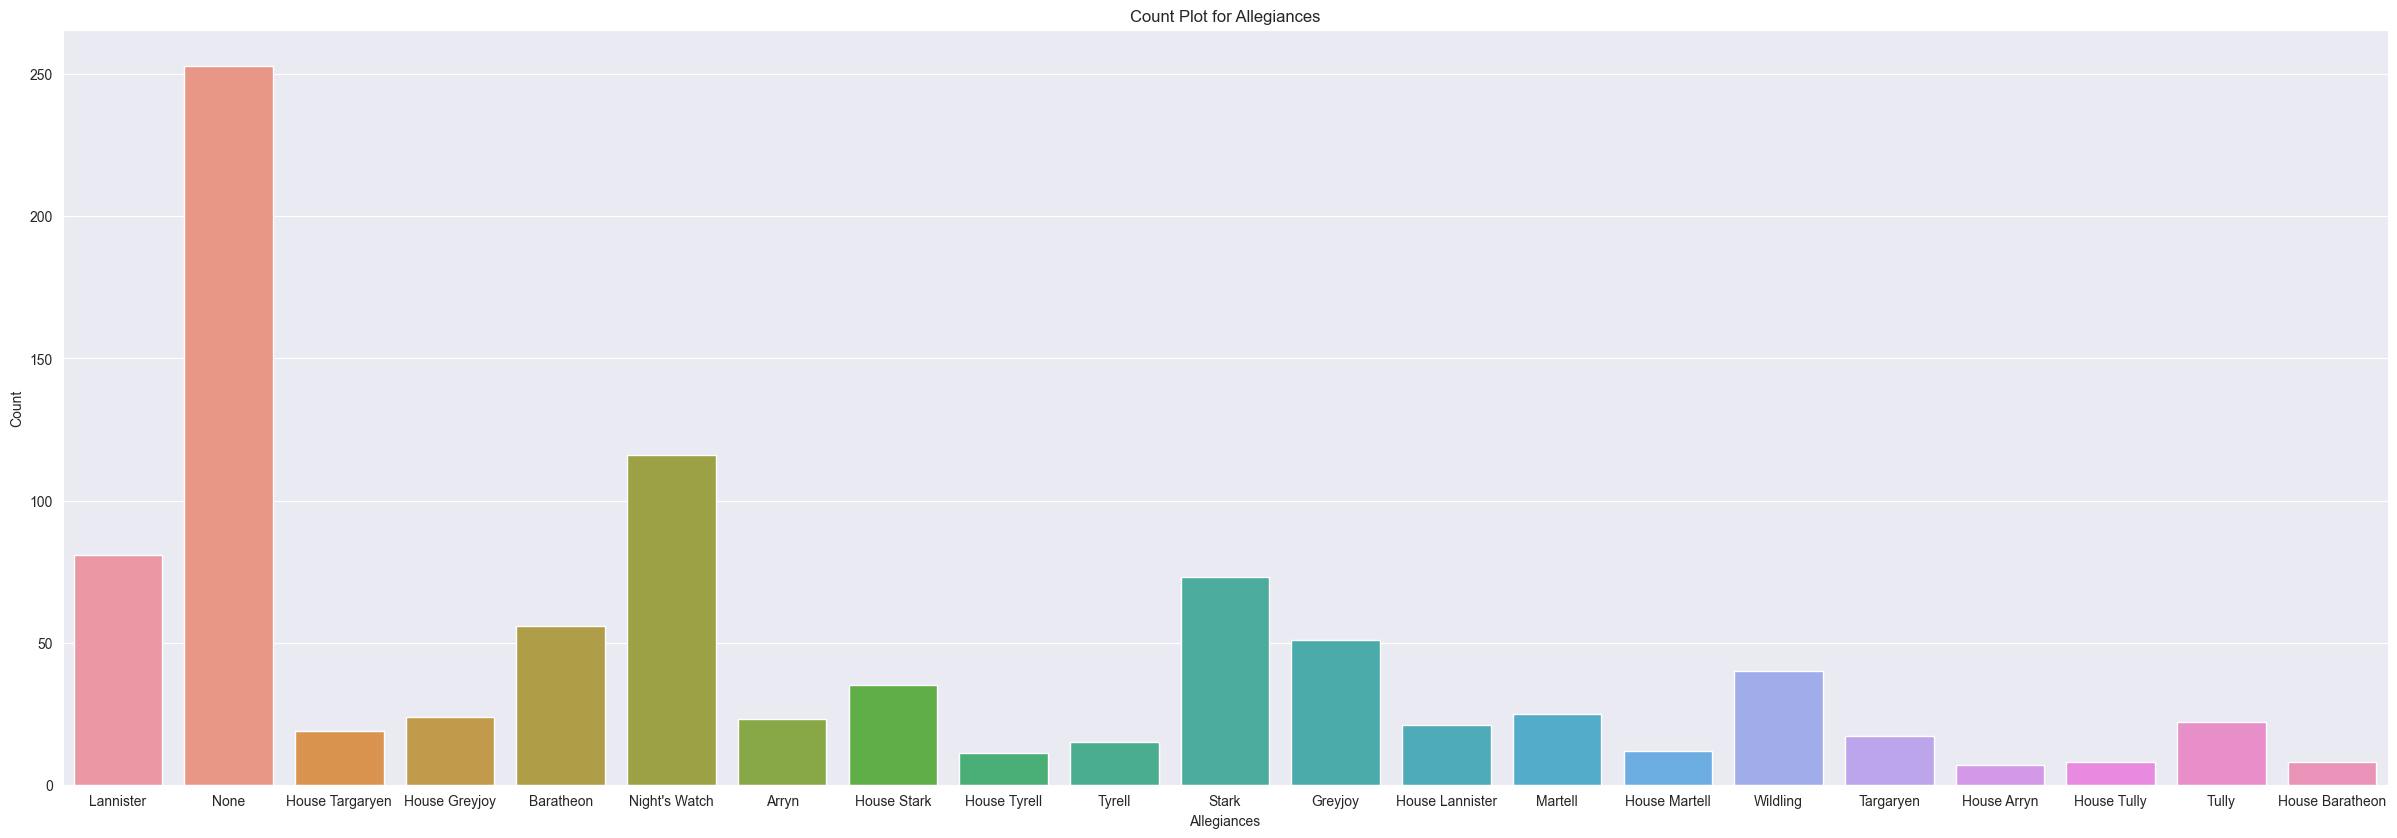

In [35]:
plt.rcParams["figure.figsize"] = (30, 10)
sns.countplot(x=character_deaths["Allegiances"])
plt.title("Count Plot for Allegiances")
plt.ylabel("Count")
plt.show()